In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [246]:
data = pd.read_csv("OlympicsData.csv")

In [247]:
# Initial data visualization

In [248]:
data.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [249]:
data.tail()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3
2143,ZIM,Zimbabwe,2016,13,31,27.5,167.8,62.2,0,0.0,2.3


In [250]:
data.shape

(2144, 11)

In [251]:
data.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


In [252]:
data.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [254]:
data.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


<!-- Cleaning the Excess Data  -->

In [255]:
# Cleaning the Data

In [256]:
data.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [257]:
data = data[["country","year","events","athletes","prev_medals","medals"]]

In [258]:
data.head()

,country,year,events,athletes,prev_medals,medals
0,Afghanistan,1964,8,8,0.0,0
1,Afghanistan,1968,5,5,0.0,0
2,Afghanistan,1972,8,8,0.0,0
3,Afghanistan,1980,11,11,0.0,0
4,Afghanistan,2004,5,5,0.0,0


In [259]:
(data[["year","events","athletes","prev_medals","medals"]]).corr()["medals"]

year          -0.021603
events         0.771330
athletes       0.840817
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

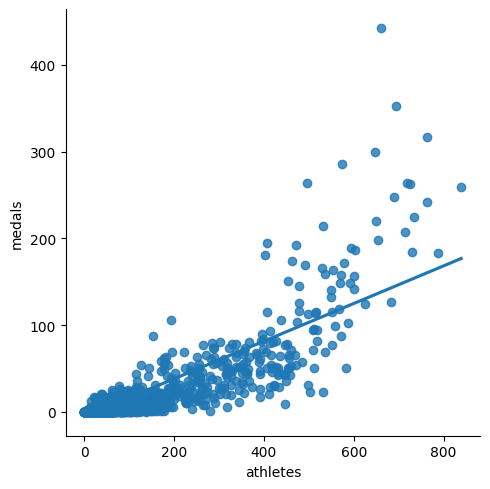

In [260]:
sns.lmplot(x="athletes",y="medals",data=data,fit_reg=True,ci=None)

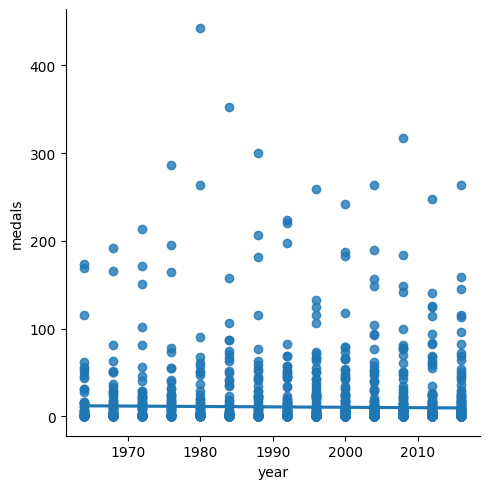

In [261]:
sns.lmplot(x="year",y="medals",data=data,fit_reg=True,ci=None)

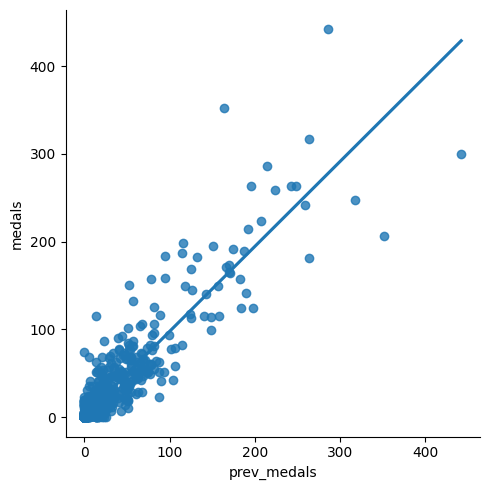

In [262]:
sns.lmplot(x="prev_medals",y="medals",data=data,fit_reg=True,ci=None)

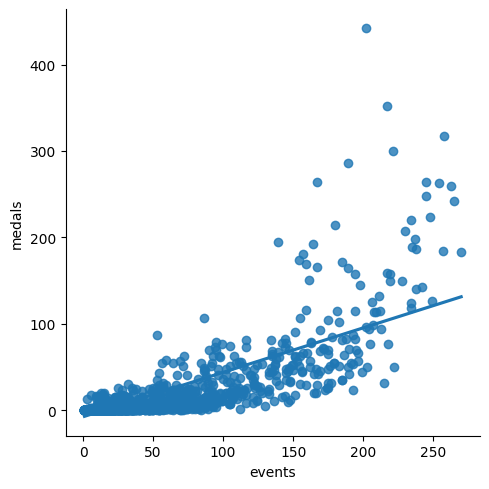

In [263]:
sns.lmplot(x="events",y="medals",data=data,fit_reg=True,ci=None)

In [264]:
# Dropping the unneccesary part that is event in our case

In [ ]:
data.drop("events",axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.plot.hist(y = "medals")

In [ ]:
# The above hist shows that our data is a little imbalanced as very few countries earned a lot of medals while the reast falls under 0-50 category

In [ ]:
# Finding missing values and removing them

In [ ]:
data[data.isnull().any(axis=1)]

In [ ]:
# So basically we dont have data of previous medals of 130 rows [maybe their first olymic or something]

In [ ]:
data.dropna(axis=0,inplace =True)

In [ ]:
# Splitting The data into test and training data sets
# We will use past data to predict future so we are dividing it into past and future

In [ ]:
train = data[data["year"]<2012].copy()
test = data[data["year"]>=2012].copy()

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
# around 80-20 split which is good

In [ ]:
reg = LinearRegression()

In [ ]:
predictors = ["athletes","prev_medals"]
target = "medals"

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [ ]:
reg.fit(train[predictors],train[target])

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
predictions

In [ ]:
# These are extrememly wrong as negative and non integer

In [ ]:
test["predictions"] = predictions

In [ ]:
test

In [ ]:
test.loc[test["predictions"]<0 , "predictions"] = 0

In [ ]:
test["predictions"]=test["predictions"].round()

In [ ]:
test

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
error = mae(test["medals"],test["predictions"])

In [ ]:
error

In [ ]:
data.medals.describe()

In [ ]:
# Since error is far below std its fine

In [ ]:
test[test.country == "United States"]

In [ ]:
# That's it, I know its not the most effocicent solution but that's fine, it's my fist ML project anyway.
# ~Sujas Aggarwal
# August,2023